# LoyalLock:  Predictive Modeling for Customer Segmentation and Churn Reduction

## Introduction

In this notebook, we utilized a customer churn dataset collected from banks in order to train and test various classification models with the goal of predicting whether a customer will churn or not in the future. Some of the techniques you will see used in this notebook are importing data, train test splits, supervised modeling, unsupervised modeling, and preprocessing: scaling the data, one-hot encoding, oversampling, and dimensionality reduction.

## Load the Data

Run the following cell to import the necessary libraries for running this project

In [73]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Customary to import NumPy as np
# Import numpy to generate some dummy data if necessary
import numpy as np 
# Import Pandas under the alias pd
import pandas as pd
# Import seaborn and set the standard alias of sns
import seaborn as sns
# Set so that our visualizations appear in the notebook and note as seprate files
%matplotlib inline

The data is stored in 'BankChurners.csv'. Load and preview the dataset below.

In [74]:
# Import the data into a Pandas DataFrame
df = pd.read_csv('data/BankChurners.csv')

In [75]:
#Returns the number of columns in a DataFrame
len((df.columns))

23

We can see that there are currently 23 columns in the dataframe.

In [76]:
#Displays first 5 rows of the DataFrame 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


As we can see from our initially examination of the data, there seems to be unnecessary columns in the dataframe so run the cell below to drop those.

In [77]:
#Drops last two columns of the DataFrame 
df = df.drop(df.columns[-2:], axis=1)
#Removes column CLIENTNUM
df = df.drop(["CLIENTNUM"], axis=1)

In [78]:
#Returns the number of columns in a DataFrame
len(df.columns)

20

Now that the length of our column list is 20 instead of 23 we can confirm that the columns were dropped. Furthermore, we now need to explore the target for this use case that our model will predict on. The dataset contains a column 'Attrition_Flag' that has textual information for each customer and tells us whether that individual attrited or not. However, our model will need to predict an integer value so we will have to change the text to a binary variable in the preprocessing step.

In [79]:
#Counts the occurance of each unique value in attrition_flag column
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Furthermore, the information displayed above shows us that there is a massive imbalance in the distribution of our target variables. This will have to be accounted for with SMOTE down the line.

## EDA

Exploratory Data Analysis is the process of digging into your data, making visualizations, and drawing conclusions from those. This step is normally conducted as a beginning step to draw insights from the data that could help us make decisions about how to create the model down the line.

In [80]:
# Existing Customer will be 1 and Attrited Customer will be 0
df["Attrition_Flag"] = df["Attrition_Flag"].map({'Existing Customer': 1, 'Attrited Customer': 0})

Here we split the data into features and target as the EDA will be performed on them seperately.

In [81]:
#Y  is target variable, everything else is X
y = df["Attrition_Flag"]
X = df.drop(["Attrition_Flag"], axis=1)

Initially, we wanted to see what the averages for the different numerical features were in order to determine if we need to scale the features or not

In [82]:
#Returns description of data in DataFrame
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


After analyzing the information above, it is clear that we will need to standardize the data some how down the line. Now we want to see just how much of our data is numerical vs. categorical because this will affect how we handle the two classes.

In [83]:
#Prints a summary of DataFrame
#Includes dtype, columns dtypes, non-null values
#Includes the total number of entries and each attribute's type and number of non-null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

It is more or less 50/50 on numerical vs. categorical data. Now, we want to take a look at some of the distributions of the categorical data as some may have imbalences within them.

In [84]:
#Counts the occurance of each unique value in Gender column
df["Gender"].value_counts(normalize=True)

F    0.529081
M    0.470919
Name: Gender, dtype: float64

In [85]:
#Counts the occurance of each unique value in Education_Level column
df["Education_Level"].value_counts(normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

In [86]:
#Counts the occurance of each unique value in Marital_Status column
df["Marital_Status"].value_counts(normalize=True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [87]:
#Counts the occurance of each unique value in Income_Category column
df["Income_Category"].value_counts(normalize=True)

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

In [88]:
#Counts the occurance of each unique value in Card_Category column
df["Card_Category"].value_counts(normalize=True)

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

As we can see there are definitely imbalances in some of the features. What this tells us is that the features with extremely high imbalences are ones that will not provide much information on the target value as they are less variable meaning there is not much information gathered from the feature.

In [89]:
#Counts occurance of each unqiue value in variable Y
y.value_counts() # Note: imbalance within the target data, will need to be handled

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

Finally, we see the target imbalance again, this will need to be fixed.

Now we, create Visualizations for each feature by their target value to see if there are any features in which we can already define a trend

c:\Users\ajarcik\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


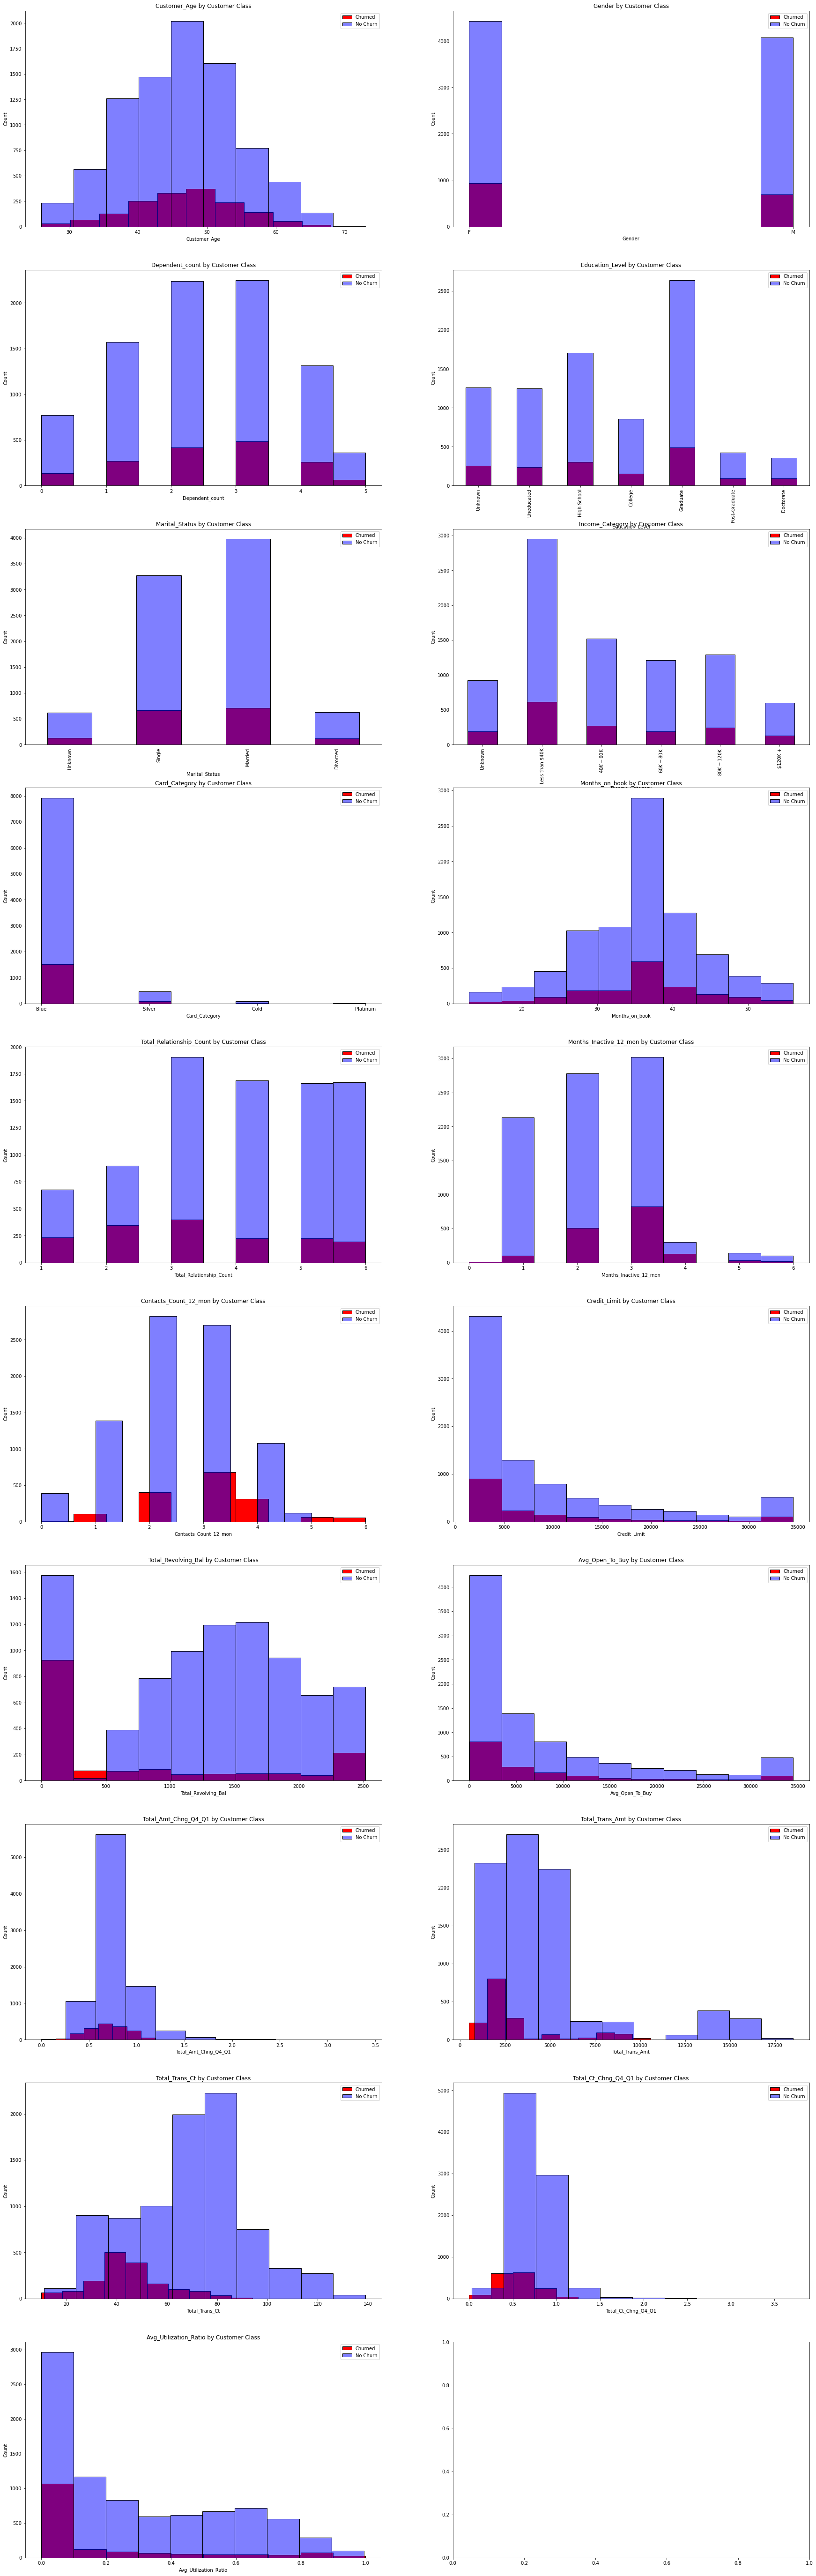

In [90]:
# Create a subplot grid of 4 rows and 5 columns, with a specified figure size of 15x12
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(30,100))

# Creates dataframes/series for targets and features by target class
attrited_cust = df.loc[df["Attrition_Flag"] == 0]
other_cust = df.loc[df["Attrition_Flag"] == 1]
attrited_cust.drop(["Attrition_Flag"], inplace=True, axis=1)
other_cust.drop(["Attrition_Flag"], inplace=True, axis=1)

# For each subplot, plot a histogram of the data from the corresponding column in X dataframe
# The column index for the data is calculated as (i*j)-1
i = 0
j = 0
for col in attrited_cust.columns:
    if col == "Education_Level":
        # This handles the plot for Education Level
        attrited_cust[col].value_counts().loc[['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']].plot.bar(ax=ax[j][i], color="red", edgecolor="black", lw=1, label="Churned")
        other_cust[col].value_counts().loc[['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']].plot.bar(ax=ax[j][i], edgecolor="black", lw=1, fc=(0, 0, 1, 0.5), label="No Churn")
        # Sets title of plot
        ax[j][i].set_title(f"{col} by Customer Class")
    elif col == "Marital_Status":
        # This handles the plot for Marital Status
        attrited_cust[col].value_counts().loc[['Unknown', 'Single', 'Married', 'Divorced']].plot.bar(ax=ax[j][i], color="red", edgecolor="black", lw=1, label="Churned")
        other_cust[col].value_counts().loc[['Unknown', 'Single', 'Married', 'Divorced']].plot.bar(ax=ax[j][i], edgecolor="black", lw=1, fc=(0, 0, 1, 0.5), label="No Churn")
        # Sets title of plot
        ax[j][i].set_title(f"{col} by Customer Class")
    elif col == "Income_Category":
        # This handles the plot for Income Category
        attrited_cust[col].value_counts().loc[['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']].plot.bar(ax=ax[j][i], color="red", edgecolor="black", lw=1, label="Churned")
        other_cust[col].value_counts().loc[['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']].plot.bar(ax=ax[j][i], edgecolor="black", lw=1, fc=(0, 0, 1, 0.5), label="No Churn")
        # Sets title of plot
        ax[j][i].set_title(f"{col} by Customer Class")
    else:
        # This handles the plot for everything else
        ax[j][i].hist(attrited_cust[col], color="red", edgecolor="black", lw=1, label="Churned")
        ax[j][i].hist(other_cust[col], edgecolor="black", lw=1, fc=(0, 0, 1, 0.5), label="No Churn")
        # Sets title of plot
        ax[j][i].set_title(f"{col} by Customer Class")
    # Sets x label
    ax[j][i].set_xlabel(col)
    # Sets y label
    ax[j][i].set_ylabel("Count")
    # Sets tick parameters
    ax[j][i].tick_params(axis='both', which='major', labelsize=10)
    ax[j][i].tick_params(axis='both', which='minor', labelsize=8)
    # Creates plot legend
    ax[j][i].legend()
    # Iterated i and j to the next numbers
    if i == 1:
        i = 0
        j += 1
    else:
        i += 1

As expected, most of the features have similar distributions for attrited and existing customers. This is normal as it is very difficult for the human eye to pick up on these subtle differences visually. However, there are a few features that we can see have a difference. We will go into these two further in the next few cells. 

In [91]:
# Finds the average total transaction count for attrited customers
print(attrited_cust["Total_Trans_Ct"].mean())
# Finds the average total transaction count for existing customers
print(other_cust["Total_Trans_Ct"].mean())
# Finds the average total transaction amount for attrited customers
print(attrited_cust["Total_Trans_Amt"].mean())
# Finds the average total transaction amount for existing customers
print(other_cust["Total_Trans_Amt"].mean())

44.93362015980332
68.67258823529411
3095.025814382299
4654.655882352941


As we can see from the means above, there is a clear visual and statistical difference between the two target classes in repect to Total transaction account and amount. This gives us good insight into some of the factors that lead to a customer leaving their current credit card company. Lower transaction amounts/counts implies that the people who leave are not using their card as much as those who stay. This gives information to the model and the company as those with lower amounts and counts probably have a higher probability of leaving that card company.

This concludes our EDA process, and now that we know what our data looks like, the distributions of it, and the variable types we can begin pre-processing.

## Preprocessing

Pre-processing is the technique that allows us to get our data ready for model consumption. This typically includes scaling, encoding of categorical data, balancing of target classes, dimensionality reduction, and much more. Here we will focus on the four processes that were just listed.

### OHE and Scaling

Due to the fact that we have numerical and categorical data in our dataset, we have to perform One Hot Encoding on all categorical data since models cannot interpret text. Furthermore, we have to conduct scaling on our numerical data so that the model treats all numerical data with the same magnitude.

In [92]:
#Importing all necessary libraries for use
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#OneHotEncoder from scikit-learn can be used to convert categorical variables into dummy one-hot encoded variables:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

Also, we perform our train test split before we do any of the pre-processing because each of these techniques will be conducted on the train and test sets independently.

In [93]:
#Split dataset into training and testing sets. X is the feature set, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [94]:
# Define a list of column names that represent categorical features in the dataset
categorical_features = ['Gender','Education_Level', 'Marital_Status','Income_Category','Card_Category']
# Create a new DataFrame 'X_train_categorical' that includes only the categorical columns from the training data
X_train_categorical = X_train[categorical_features].copy()
# Display the 'X_train_categorical' DataFrame
X_train_categorical

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
6780,F,Uneducated,Single,$40K - $60K,Blue
4555,M,Unknown,Married,$120K +,Blue
811,M,Unknown,Divorced,$60K - $80K,Blue
1940,M,Graduate,Divorced,$40K - $60K,Blue
6658,F,High School,Single,Less than $40K,Blue
...,...,...,...,...,...
9225,M,Unknown,Single,$60K - $80K,Blue
4859,M,Uneducated,Single,$60K - $80K,Blue
3264,M,Unknown,Single,$60K - $80K,Blue
9845,M,College,Married,$120K +,Blue


One hot encoding takes a categorical value and turns it into a binary number in which each bit represents a category. For example, 001 will be the first category, 010 will be the second, 100 will be the third, and 000 will be the baseline category. Since the above code split the dataset into only categorical values we can easily apply this to the dataframe above by doing the following.

In [95]:
# Initialize a OneHotEncoder from sklearn's preprocessing module
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
# Fit the one hot encoder model
ohe.fit(X_train_categorical)
# Transform the categorical columns in the training data into one-hot encoded columns
X_train_ohe = pd.DataFrame(
     # Transform the categorical data into one-hot encoded format
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    # Create column names for the one-hot encoded columns by stacking the categories from each original column
    columns=np.hstack(ohe.categories_)
)
# Display the newly created DataFrame 'X_train_ohe'
X_train_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category


Now our binary values for each data entry have been recorded in the variable X_train_ohe. We will move to handling the numerical data next.

In [96]:
#Define a list of column names that represent numeric features in the dataset
numeric_features = ['Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
# Create a new DataFrame 'X_train_numeric' that includes only the numeric columns from the training data
X_train_numeric = X_train[numeric_features].copy()
# Display the 'X_train_numeric' DataFrame
X_train_numeric

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6780,47,3,35,6,5,2,4543.0,1028,3515.0,0.799,4093,77,0.571,0.226
4555,43,4,37,3,1,3,20695.0,1250,19445.0,0.605,3924,82,0.783,0.060
811,43,3,30,3,2,1,2588.0,1669,919.0,0.788,1053,31,0.550,0.645
1940,36,3,28,4,2,3,8995.0,1547,7448.0,0.923,2398,61,0.794,0.172
6658,39,1,31,5,2,1,1862.0,726,1136.0,0.630,5105,79,1.026,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,0,20,1,3,3,23760.0,1349,22411.0,0.961,13124,103,0.746,0.057
4859,50,2,43,4,3,3,4388.0,642,3746.0,0.815,3836,81,0.723,0.146
3264,60,1,50,4,3,0,10698.0,1790,8908.0,0.981,4095,67,0.914,0.167
9845,51,3,40,3,3,2,34516.0,1476,33040.0,0.763,14145,119,0.776,0.043


The code above split out all of the numerical data so now we are able to apply Standard Scaler to the dataframe above in order to normalize all of the data points with a normal distribution. This will ensure that the model treats every feature with the same weight.

In [97]:
# Import MinMaxScaler from the sklearn.preprocessing
from sklearn.preprocessing import StandardScaler # MinMax
# Instantiate the MinMaxScaler
scaler = StandardScaler()
# Fit the MinMaxScaler to the numeric columns in the training data
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)

# Concatenate the scaled numeric DataFrame 'X_train_scaled' and the one-hot encoded DataFrame 'X_train_ohe'
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
# Display the newly created DataFrame 'X_train_full'
X_train_full

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
6780,0.073104,0.503516,-0.124793,1.411757,2.614490,-0.408356,-0.454138,-0.160888,-0.439756,0.178225,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4555,-0.426760,1.274058,0.126314,-0.518913,-1.320522,0.488539,1.322717,0.110302,1.313105,-0.702404,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
811,-0.426760,0.503516,-0.752561,-0.518913,-0.336769,-1.305251,-0.669204,0.622144,-0.725408,0.128292,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1940,-1.301523,0.503516,-1.003668,0.124644,-0.336769,0.488539,0.035620,0.473111,-0.006988,0.741101,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6658,-0.926625,-1.037569,-0.627007,0.768201,-0.336769,-1.305251,-0.749070,-0.529804,-0.701530,-0.588921,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,-2.051319,-1.808111,-2.008096,-1.806026,0.646984,0.488539,1.659893,0.231239,1.639469,0.913595,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4859,0.448002,-0.267027,0.879635,0.124644,0.646984,0.488539,-0.471189,-0.632417,-0.414338,0.250854,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3264,1.697663,-1.037569,1.758509,0.124644,0.646984,-2.202146,0.222964,0.769955,0.153664,1.004382,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9845,0.572968,0.503516,0.502974,-0.518913,0.646984,-0.408356,2.843143,0.386379,2.809034,0.014809,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


This following cell simply does the above two operations on the test data, except it is all done within the same cell.

In [98]:
# Handling categorical data
X_test_categorical = X_test[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

X_test_ohe.drop(["Unknown"], axis=1, inplace=True) # Drops all of the Unknown categories as these will serve as our base case for that individual encoded category

# Normalization
X_test_numeric = X_test[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Platinum,Silver
3358,-0.301794,2.044600,0.377421,0.768201,-0.336769,-2.202146,0.809968,0.534190,0.762049,0.069281,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9951,-0.301794,0.503516,-0.250347,-1.162469,0.646984,0.488539,1.908622,-1.416670,2.036697,1.272202,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3848,-1.176557,0.503516,-1.254775,-0.518913,-1.320522,-0.408356,-0.633011,1.290347,-0.749395,0.228157,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1666,-1.551455,-1.037569,0.000760,1.411757,-0.336769,0.488539,-0.543024,0.153058,-0.556944,1.244966,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8383,0.572968,1.274058,-0.375900,-1.162469,1.630737,0.488539,-0.616400,1.113218,-0.716825,0.427888,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,-1.301523,-1.037569,0.000760,-0.518913,0.646984,1.385434,-0.667774,0.802937,-0.740263,-0.439123,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5252,-0.426760,0.503516,0.000760,-0.518913,0.646984,-0.408356,0.011638,1.658042,-0.137710,-0.289326,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6955,-1.051591,-0.267027,-0.627007,1.411757,0.646984,0.488539,-0.599459,-1.416670,-0.471997,0.119214,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8865,0.323036,1.274058,0.502974,-1.162469,0.646984,-0.408356,-0.110471,1.259807,-0.223977,-0.352876,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Now that our data has been encoded and standardized we can move into dimensionality reduction.

### Dimensionality Reduction

Dimensionality reduction is the process of calculating the percentage of variance that each feature explains with respect to the target. This is done becuase, typically, we can explain ~70% of the variance with only a few features. You may ask yourself why would we ever reduce the amount of information we pass to the model. Well, with a dataset as small as ours (about 9000 entries) overfitting becomes a huge issue. Dimensionality reduction is one of the best ways to reduce overfitting as it calculates how many features you need to reach a certain percentage of explained variation, meaning it calculates the bare minimum number of features you have to pass to the model for it to make an informed decission without giving it too much information which leads to overfitting. And for our purposes, we will make that threshhold about 70% as this is an industry standard.

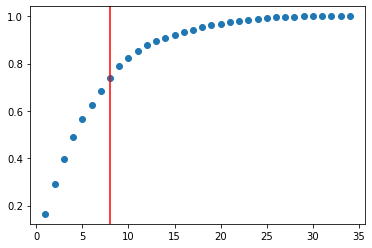

In [99]:
from sklearn.decomposition import PCA

# Initializes the list that will contain the variances
variances = []
# Calculates the amount of target variance explained by each feature
for i in range(1, len(X_train_full.columns) + 1):
    pca = PCA(n_components=i)
    pca.fit(X_train_full)
    # Makes it so that they are cummulative variances in order to visualize the graph
    variances.append(sum(pca.explained_variance_ratio_))
# Displays the increase in explained variance as we add features
plt.scatter(range(1, len(X_train_full.columns) + 1), variances)
# Shows the x value that we reach 70% at
plt.axvline(x=8, color='r');

From the above plot, we can see that we reach the 70% explained variance threshold when we hit about 8 features. Therefore, we will take the 8 features that have the highest explained variation between itself and the target and use those to train/test the model.

In [100]:
# Instantiating the pca object
pca = PCA(n_components=8)

# fit transform the pca on the data
X_train_pca = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test_full)

In [101]:
# Shows we have 73% explained variance from 8 features.
sum(pca.explained_variance_ratio_)

0.7386092466913609

Once we get to the training and testing of the models, we will use the pre-PCA and post-PCA data so that we can compare the results.

### SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. What this does is that it analyzes and trains a model on the minority class represented within the data and creates synthetic instances of this minority class in order to increase the number of the minority class instances.

In [102]:
# We run this code due to the imbalance of the classes within our data
oversample = SMOTE(random_state=42) # Instantiating SMOTE object for oversampling with random state 42
X_train_final, y_train_final = oversample.fit_resample(X_train_pca, y_train) # Resample the data in order to make the class counts balanced

In [103]:
# This does SMOTE on the non-PCA data
X_train_ex, y_train_ex = oversample.fit_resample(X_train_full, y_train)

In [104]:
print(y_train_final.value_counts())
y_train_ex.value_counts()

1    6352
0    6352
Name: Attrition_Flag, dtype: int64


1    6352
0    6352
Name: Attrition_Flag, dtype: int64

As we can see, we now have completely balanced data sets in terms of the target values for both the non PCA transformed data and the PCA transformed data.

## Models without PCA

For this section, all models will be trained and tested on the data that did not get transformed by PCA. We will compare the results of the models using accuracy and precision. We use precision because the prediction of False positives is very detrimental to this (customer that is predicted to stay but actually leaves).

The target value 1 means that a customer stays, 0 means they leave.
A false positive is a case where y_pred = 1 but y_act = 0: meaning we predict them to stay, but they churn out in reality.
So, false positive is our crucial metric.
Thus, precision is our crecual statistic because precision increases as the false positive rate decrease.

### Logistic Regression

This model serves as or baseline model, we did not expect great results from this modeling technique, however, we conducted it in order to have the most simplistic model to compare all of our more complex models to.

In [105]:
# Import the LogisticRegression model from the sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instantiate the LogisticRegression model with specific parameters:
# fit_intercept=False to indicate that no intercept should be used in the calculations
# C=1e12 to set the inverse of regularization strength to a very large number, effectively disabling regularization
# solver='liblinear' to specify the algorithm used for optimization (good for small datasets)
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_ex, y_train_ex)
# Display the fitted model
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [106]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_hat_test = logreg.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_hat_test)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_hat_test)

Accuracy is :0.8432069510268563
Precision is :0.9679315873864244

AUC is :0.84

Confusion Matrix
----------------


array([[ 324,   60],
       [ 337, 1811]], dtype=int64)

As we can see the model performed very well with an accuracy and precision of 84% and 97% respectively. Since this is such a simple model that performed so well with these metrics, we can conclude that there is overfitting happeneing here.

### Decision Trees

Decision Trees are some of the most explainable models in the realm of machine learning as it makes concrete decisions about what the data point can be based on if its various features fall above or below a certain threshold.

In [107]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_ex, y_train_ex)

DecisionTreeClassifier(random_state=42)

In [108]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.9324644549763034
Precision is :0.968705547652916

AUC is :0.89

Confusion Matrix
----------------


array([[ 318,   66],
       [ 105, 2043]], dtype=int64)

As we can see from the accuracy being 93% and the precision being 96%, the model performed better than the baseline, however, these high of numbers still suggest overfitting is ocurring with this non-PCA data. Finally, a visualization of the decision tree is shown below, however, it is very large and difficult to interpret as there are about 20 different features in this dataset

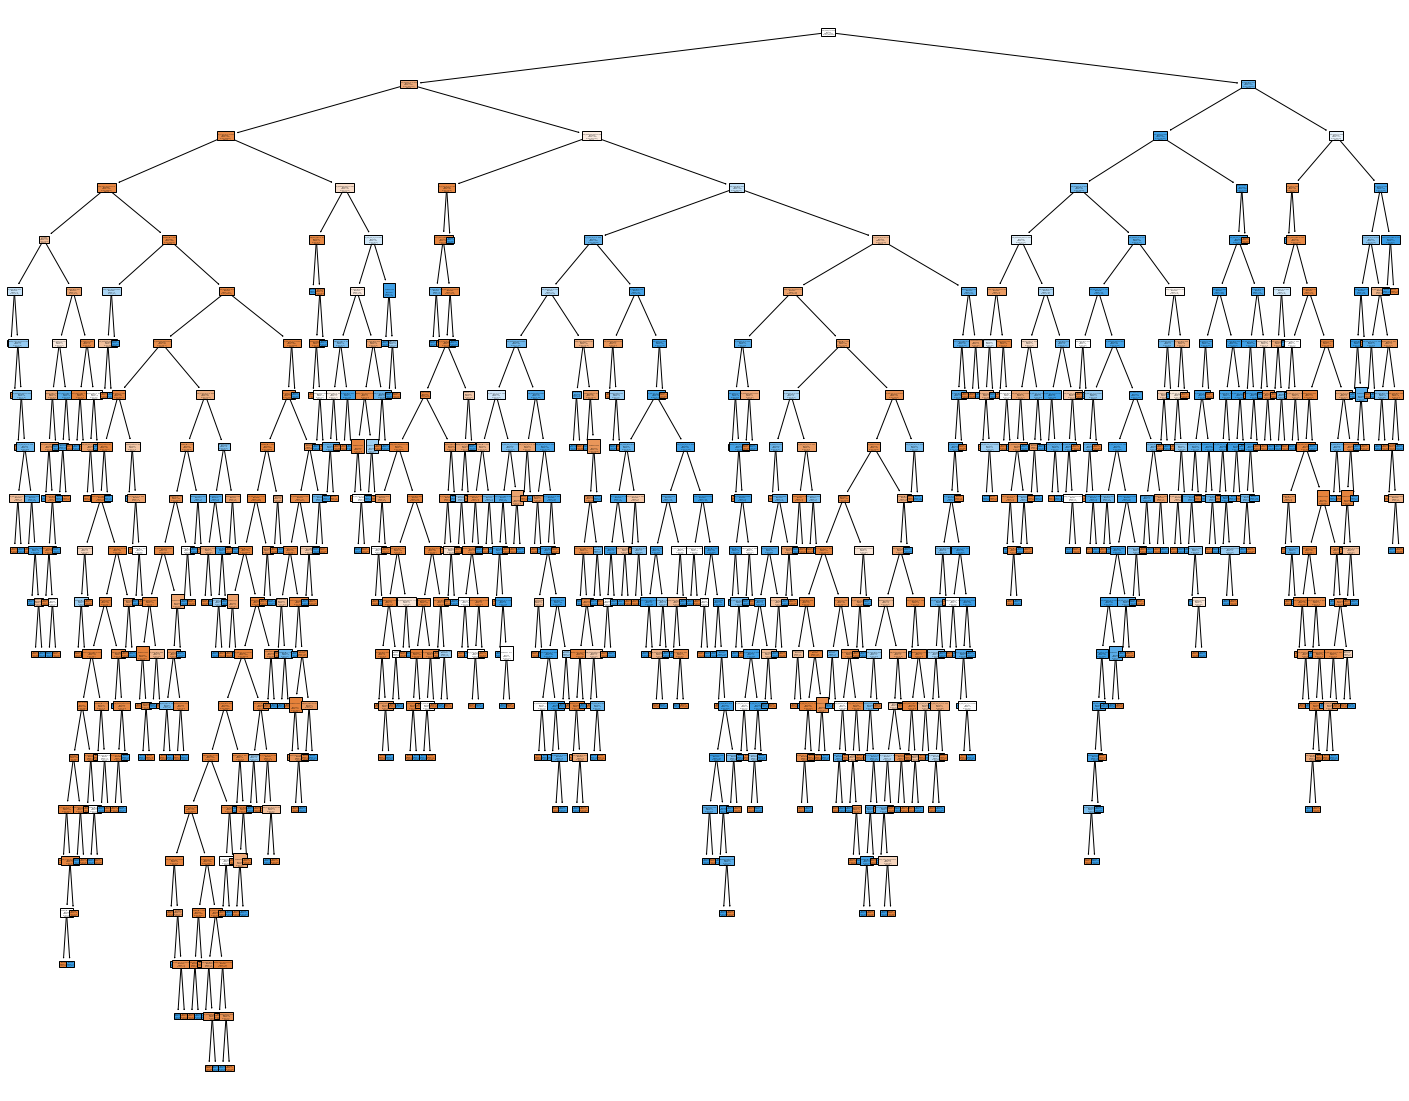

In [109]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model, feature_names=X_train_ex.columns, class_names=["0","1"], filled=True)

### Random forest

Since we experienced such success with Decision Trees, we wanted to try random forest as well since this is just a combination of multiple decision trees.

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier object with a random state of 42
model = RandomForestClassifier(max_depth=3, random_state=42)
# Fit the classifier
model.fit(X_train_ex, y_train_ex)

RandomForestClassifier(max_depth=3, random_state=42)

In [111]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8669036334913112
Precision is :0.9612837493632196

AUC is :0.84

Confusion Matrix
----------------


array([[ 308,   76],
       [ 261, 1887]], dtype=int64)

The performance saw a drop off here and is very similar to the performance of the baseline model, so we will probably not consider Random Forest as one of the best performing models as it is most likely overfitting as well.

### KNN

K nearest neighbors is another supervised learning model that we wanted to try out as it performs its decision making process much differently than decision trees and random forests. It looks at the 5 nearest data points around the current one and classifies the current data point with whatever the majority class is between those 5 nearest neighbors.

In [112]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier object with n-neighbors as 5
model = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier
model.fit(X_train_ex, y_train_ex)

KNeighborsClassifier()

In [113]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8562401263823065
Precision is :0.9679958027282266

AUC is :0.85

Confusion Matrix
----------------


array([[ 323,   61],
       [ 303, 1845]], dtype=int64)

The performance saw a drop off here and is very similar to the performance of the baseline model, so we will probably not consider KNN as one of the best performing models as it is most likely overfitting as well.

### KMeans

K means is the only unsupervised learning method we used as we wanted to test one out in case it turned out to perform very well. We did not expect it to due to the fact that this problem is better solved with a supervised model as there are not many trends within the data.

In [114]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)

# Fit the classifier
model.fit(X_train_ex, y_train_ex)

KMeans(n_clusters=2, random_state=42)

In [115]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_full)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.6974723538704581
Precision is :0.843098311817279

AUC is :0.48

Confusion Matrix
----------------


array([[  68,  316],
       [ 450, 1698]], dtype=int64)

As our hypothesis suggested, this was our worst performing model and will not be the one we choose to proceed with.

In conclusion, we see our models experiencing heavy overfitting, so we will need to train and test the models using the PCA transformed data to see if we can reduce the overfitting. Furthermore, Decision Trees seemed to be out best performing model, so in the next step we will make sure to keep an eye on that model.

## Models with PCA

For this section, all models will be trained and tested on the data that did get transformed by PCA. We will compare the results of the models using accuracy and precision. We use precision because the prediction of False positives is very detrimental to this (customer that is predicted to stay but actually leaves).

### Logistic Regression

This model serves as or baseline model, we did not expect great results from this modeling technique, however, we conducted it in order to have the most simplistic model to compare all of our more complex models to.

In [116]:
# Import the LogisticRegression model from the sklearn.linear_model
from sklearn.linear_model import LogisticRegression
# Instantiate the LogisticRegression model with specific parameters:
# fit_intercept=False to indicate that no intercept should be used in the calculations
# C=1e12 to set the inverse of regularization strength to a very large number, effectively disabling regularization
# solver='liblinear' to specify the algorithm used for optimization (good for small datasets)
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_final, y_train_final)
# Display the fitted model
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [117]:
# Use the trained Logistic Regression model to make predictions on the training data
y_hat_train = model_log.predict(X_train_final)

In [118]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

# Use the trained Logistic Regression model to make predictions on the test data
y_hat_test = model_log.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_hat_test)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_hat_test)

Accuracy is :0.6374407582938388
Precision is :0.9617117117117117

AUC is :0.73

Confusion Matrix
----------------


array([[ 333,   51],
       [ 867, 1281]], dtype=int64)

As we can see here, our overall accuracy dropped significantly for this model, showing us that the PCA transformations did in fact reduce overfitting due to the fact that accuracy is now at 64%

### Decision Trees

Decision Trees are some of the most explainable models in the realm of machine learning as it makes concrete decisions about what the data point can be based on if its various features fall above or below a certain threshold.

In [119]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [120]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8258293838862559
Precision is :0.9235732009925558

AUC is :0.73

Confusion Matrix
----------------


array([[ 230,  154],
       [ 287, 1861]], dtype=int64)

This model has a high accuracy and precision when compared to the baseline, and both are low enough to indicate that overfitting is most likely not ocurring. Thus, with these results, we can safely put Decision Trees as the front runner for our model selection process as of now.

### Random Forest

Since we experienced such success with Decision Trees, we wanted to try random forest as well since this is just a combination of multiple decision trees.

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier object with a random state of 42
model = RandomForestClassifier(max_depth=3, random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

RandomForestClassifier(max_depth=3, random_state=42)

In [122]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8218799368088467
Precision is :0.9349051768323936

AUC is :0.76

Confusion Matrix
----------------


array([[ 257,  127],
       [ 324, 1824]], dtype=int64)

These are very similar results to the decision tree, however, we are going to move forward with the Decision Tree and not the Random Forest since Decision Trees are much more explainable than Random Forests.

### KNN

K nearest neighbors is another supervised learning model that we wanted to try out as it performs its decision making process much differently than decision trees and random forests. It looks at the 5 nearest data points around the current one and classifies the current data point with whatever the majority class is between those 5 nearest neighbors.

In [123]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier object with n-neighbors as 5
model = KNeighborsClassifier(n_neighbors=5)
# Fit the classifier
model.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [124]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.825434439178515
Precision is :0.9546908315565032

AUC is :0.81

Confusion Matrix
----------------


array([[ 299,   85],
       [ 357, 1791]], dtype=int64)

These are very similar results to the decision tree, however, we are going to move forward with the Decision Tree and not the KNN since Decision Trees are much more explainable than KNN.

### K Means

K means is the only unsupervised learning method we used as we wanted to test one out in case it turned out to perform very well. We did not expect it to due to the fact that this problem is better solved with a supervised model as there are not many trends within the data.

In [125]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)

# Fit the classifier
model.fit(X_train_final, y_train_final)

KMeans(n_clusters=2, random_state=42)

In [126]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.6927330173775671
Precision is :0.843186372745491

AUC is :0.48

Confusion Matrix
----------------


array([[  71,  313],
       [ 465, 1683]], dtype=int64)

As expected this only performed slightly better than our baseline, so we will not continue with this unsupervised learning method.

In conclusion, we are going to proceed with hyper parameter optimization for decision trees since this was the model that received the best results while also being the most explainable.

## Hyper Parameter Optimization using Visuals for Decision Tree

Here we retrain and initialize the decision tree model we want to perform hyperparamter analysis on

In [127]:
from sklearn.tree import DecisionTreeClassifier # Import the Decision Tree

# Instantiate the classifier object with a random state of 42
model = DecisionTreeClassifier(random_state=42)
# Fit the classifier
model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [128]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

y_pred = model.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8258293838862559
Precision is :0.9235732009925558

AUC is :0.73

Confusion Matrix
----------------


array([[ 230,  154],
       [ 287, 1861]], dtype=int64)

Above are the baseline results for a decision tree with default parameters.

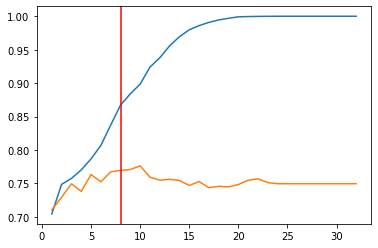

In [129]:
# Create list of possible values for max_depth
depth_list = np.linspace(1,32,32)
total_roc_auc_train = []
total_roc_auc_test = []
# Fit, predict, and calculating AUC curve for each Decision Tree model with a different max_depth
for depth in depth_list:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=int(depth), random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
# Plot all results
plt.plot(depth_list, total_roc_auc_train)
plt.plot(depth_list, total_roc_auc_test)
plt.axvline(x=8, color='r');

This tells us that the optimal max_depth for this model is at 8 due to the fact that this is when the test AUC curve stops increasing meaning that the model is not learning anymore past this point.

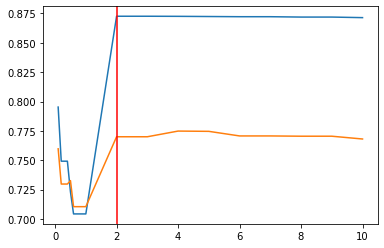

In [130]:
# Identify the optimal min-samples-split for given data
split_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0,2,3,4,5,6,7,8,9,10]
total_roc_auc_train = []
total_roc_auc_test = []
# Fit, predict, and calculating AUC curve for each Decision Tree model with a different min_samples_split
for sp in split_list:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_split=sp, random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
# Plot results
plt.plot(split_list, total_roc_auc_train)
plt.plot(split_list, total_roc_auc_test)
plt.axvline(x=2, color='r');

This tells us that the optimal min_samples_split for this model is at 2 due to the fact that this is when the test AUC curve stops increasing meaning that the model is not learning anymore past this point.

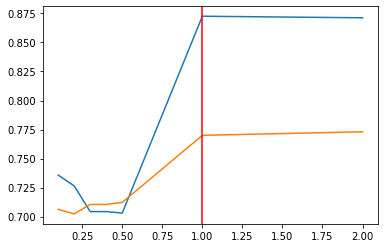

In [131]:
# Calculate the optimal value for minimum sample leafs
leaf_list = [.1,.2,.3,.4,.5,1,2]
total_roc_auc_train = []
total_roc_auc_test = []
# Fit, predict, and calculating AUC curve for each Decision Tree model with a different min_samples_leaf
for sp in leaf_list:
    dt = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=sp, random_state=42)
    dt.fit(X_train_final, y_train_final)
    y_train_pred = dt.predict(X_train_final)
    y_test_pred = dt.predict(X_test_pca)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train_final, y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test, y_test_pred)
    roc_auc_train = auc(false_positive_rate_train, true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    total_roc_auc_train.append(roc_auc_train)
    total_roc_auc_test.append(roc_auc_test)
# Plot results
plt.plot(leaf_list, total_roc_auc_train)
plt.plot(leaf_list, total_roc_auc_test)
plt.axvline(x=1, color='r');

This tells us that the optimal min_samples_leaf for this model is at 1 due to the fact that this is when the test AUC curve stops increasing meaning that the model is not learning anymore past this point.

Now that we have the optimal hyperparameter values for our Decision Tree model, we create the final model that will be used for LoyalLock with these parameters. Then we train/fit it and predict the test set to see results

In [132]:
# Optimal model
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt.fit(X_train_final, y_train_final)

from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score

# Predict data
y_pred = dt.predict(X_test_pca)

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Calculate Precision
prec = precision_score(y_test, y_pred)
print('Precision is :{0}'.format(prec))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
from sklearn.metrics import confusion_matrix
print('----------------')
confusion_matrix(y_test, y_pred)

Accuracy is :0.8238546603475514
Precision is :0.9391124871001032

AUC is :0.77

Confusion Matrix
----------------


array([[ 266,  118],
       [ 328, 1820]], dtype=int64)

In conclusion, our optimal model is able to predict the correct class for 83% of customers at your company, and will not incorrectly classify someone as a customer that stays when they actually leave 94% of the time. Yes, there were other models that had slightly better metrics than this final one, however, none are as explainable as the decision tree and this model experiences a very small amount of over fitting if at all.